# Les bases de [Lcapy](https://lcapy.readthedocs.io/en/latest/index.html)

[Lcapy](https://lcapy.readthedocs.io/en/latest/index.html) est une extension permettant de faire des calculs de circuits électriques et même d'en faire la représentation schématique. Cette extension est bâtie sur la base de [SymPy](https://www.sympy.org/fr/) dont elle peut donc aussi utiliser les resources.

## Les expressions

Il exsite des variables prédéfinie dans Lcapy, qui correspondent chacune à un domaine prédéfini.

- t : le temps
- f : les fréquences (Fourier)
- F : les fréquences normalisées (Fourier)
- s : les fréquences complexes (domaine de Laplace)
- omega : secteur angulaire des fréquences
- Omega : secteur angulaires des fréquences normalisées
- jf : domaine des réponses en fréquence
- jomega (jw) : domain des secteurs angulaires des fréquences
- n : temps discrétisé
- k : fréquence discrétisées
- z : domaine z

Les liens entre ces domaine est le suivant

![](https://lcapy.readthedocs.io/en/latest/_images/domains.png)


Il existe aussi des fonctions de Lcapy qui complètent [celles de SymPy](https://docs.sympy.org/latest/modules/functions/index.html). Parmi elles, on retrouver la fonction échelon `u(t)` (ou fonction de Heaviside) et le diract `delta(t)`.

In [3]:
from lcapy import t, delta, u
v = 2*t*u(t) + 3 + delta(t)
v

2⋅t⋅u(t) + δ(t) + 3

On trouvera plus d'informations sur les expressions, leurs attributs et leurs méthodes standards dans [la documentation](https://lcapy.readthedocs.io/en/latest/overview.html#conventions).

### Le formatage des expressions

Parmi les méthodes de Lcapy, certaines permettent des formatages pratiques.

In [7]:
from lcapy import *
G = 1 / (s**2 + 5*s +6)
G.partfrac()

    1       1  
- ───── + ─────
  s + 3   s + 2

On retrouve directement la décomposition en fractions élémentaires, ce qui permet de retrouver rapidement les pôles.

In [11]:
H = 5*(s+5)*(s-4)/(s**2 + 5*s +6)
H.partfrac()

      70      90 
5 + ───── - ─────
    s + 3   s + 2

On peut factoriser cette fonction pour retrouver les pôles zéros et infinis (Zero-pole-gain)

In [12]:
H.ZPK()

5⋅(s - 4)⋅(s + 5)
─────────────────
 (s + 2)⋅(s + 3) 

In [13]:
H.zeros()

In [14]:
H.poles()

In [15]:
G.poles()

## Les transformées de Laplace

On peut réaliser des transformées de Laplace simplement avec la méthode `LT`. On passe donc du domaine temporelle avec `t` ou domaine de Laplace avec `s`.

In [39]:
from lcapy import s, t
v = 10 * t**2 + 3*t
v.LT()

3    20
── + ──
 2    3
s    s 

Ou encore plus simplement en exprimant la fonction `v` en fonction de `s`.

In [40]:
v(s)

3    20
── + ──
 2    3
s    s 

Un autre exemple avec un Dirac.

In [41]:
delta(t)(s)

1

In [5]:
from lcapy import cos, pi, t, f
cos(4*pi*t).FT(f)

δ(f - 2)   δ(f + 2)
──────── + ────────
   2          2    

On trouvera plus de détail sur la transformée de Laplace dans [la documentation](https://lcapy.readthedocs.io/en/latest/expressions.html#laplace-transforms).

## Les phaseurs

Les [phaseurs](https://lcapy.readthedocs.io/en/latest/expressions.html#phasors) sont utilisés pour les fonctions sinusoïdales, sensées être toujours avec la même pulsation $\omega$. Dans ce cas, uniquement l'amplitude $A$ du signal et son décalage de phase $\phi$ sont caractéristiques. On traduit le signal $v(t)$ d'ampliture $A$ et de décalage de phase $\phi$ en partie entière d'un signal écrit en complexe.

$$\begin{align*}
v(t) &= A \cos(\omega t + \phi) \\
     &= Re\{ A \exp(j\phi)\exp(j\omega t)\} \\
\end{align*}$$

La partie amplitude et déphasage peut se résumer par le nombre complexe $A\exp(j\phi)$.

Sur un premier exemple avec un phaseur réel, on ne change que l'amplitude du signal normé $\cos(\omega t)$

In [44]:
from lcapy import *
P = phasor(2)
# P.time()
P(t)

/home/mathieu/Sync/informatique/programmation/python/python_par_jupyter/.venv/lib/python3.10/site-packages/lcapy/state.py:139: UserWarning: Converting t times omega to t-domain
  warn(message)


2⋅cos(ω⋅t)

En utilisant une phase $\phi = \pi / 2$ c'est à dire en complexe $-j$, on obtient un sinus.

In [43]:
from lcapy import *
s = phasor(-2*j)
s.time()

/home/mathieu/Sync/informatique/programmation/python/python_par_jupyter/.venv/lib/python3.10/site-packages/lcapy/state.py:139: UserWarning: Converting t times omega to t-domain
  warn(message)


2⋅sin(ω⋅t)

Si on entre une fonction du temps, le phaseur comprendra aussi

In [45]:
P = phasor(2*sin(3*t))
P

-2⋅ⅉ

In [46]:
P.omega

On peut créer des fonctions courant (`current()`) ou tension (`voltage()`) avec cette méthode.

In [50]:
v = voltage(phasor(2))
v.quantity

'voltage'

In [51]:
v(t)

/home/mathieu/Sync/informatique/programmation/python/python_par_jupyter/.venv/lib/python3.10/site-packages/lcapy/state.py:139: UserWarning: Converting t times omega to t-domain
  warn(message)


2⋅cos(ω⋅t)

Comme on pourrait le faire avec une fonction du temps.

In [52]:
v = voltage(2*sin(omega*t))
v = v.as_phasor()
v

/home/mathieu/Sync/informatique/programmation/python/python_par_jupyter/.venv/lib/python3.10/site-packages/lcapy/state.py:139: UserWarning: Converting omega times t to t-domain
  warn(message)


-2⋅ⅉ

et on peut retrouver les amplitudes (magnitude en Anglais) et phase.

In [53]:
v.magnitude

2

In [54]:
v.phase

-π 
───
 2 

Pour avoir la moyenne de la racine carré (utilisée pour la puissance).

In [55]:
v.rms()

√2

Enfin, on peut aussi afficher la représentation polaire de ce type de signal.

<PolarAxes: >

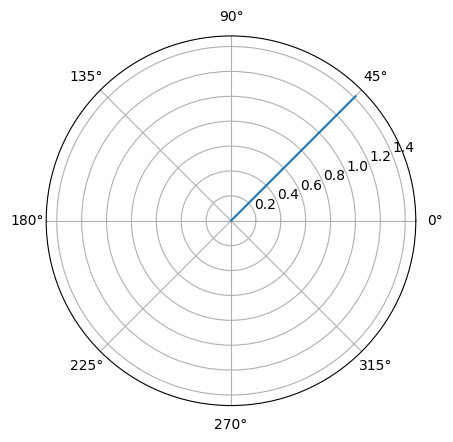

In [57]:
I = current(phasor(1+j))
I.plot()

## L'inverse de la transformée de Laplace

In [16]:
from lcapy import s
H = 5 * (s-4) / (s**2 + 5*s + 6)
H

  5⋅s - 20  
────────────
 2          
s  + 5⋅s + 6

In [17]:
H.partfrac()

  35      30 
───── - ─────
s + 3   s + 2

Il suffit de changer le domain `s` de la fonction de transfer `H` dans le domaine `t` pour obtenir la transformée de Laplace inverse.

In [19]:
H(t)

      -2⋅t       -3⋅t           
- 30⋅ℯ     + 35⋅ℯ      for t ≥ 0

Évidement, ce n'est que pour $t\geq 0$. Mais on peut utliser une condition supplémentaire pour justement introduire la fonction de Heavyside.

In [20]:
H(t, causal = True)

⎛      -2⋅t       -3⋅t⎞     
⎝- 30⋅ℯ     + 35⋅ℯ    ⎠⋅u(t)

ou aussi enlever cette condition.

In [21]:
H(t).remove_condition()

      -2⋅t       -3⋅t
- 30⋅ℯ     + 35⋅ℯ    

Pour les expressions qui n'ont pas une expression rationnelle pure, un dirac sera ajouté.

In [33]:
G = 5 * (s + 5) * (s - 4) / (s**2 + 5*s + 6)
G.partfrac()

      70      90 
5 + ───── - ─────
    s + 3   s + 2

In [32]:
G(t, causal=True)

⎛      -2⋅t       -3⋅t⎞              
⎝- 90⋅ℯ     + 70⋅ℯ    ⎠⋅u(t) + 5⋅δ(t)

On peut aussi rencontrer des fonctions avec délais.

In [34]:
from lcapy import s, symbol, exp
T = symbol('T')

H = 5 * (s + 5) * (s - 4) / (s**2 + 5*s + 6) * exp(-s*T)
H.partfrac()

⎛      70      90 ⎞  -T⋅s
⎜5 + ───── - ─────⎟⋅ℯ    
⎝    s + 3   s + 2⎠      

In [35]:
H(t, causal=True)

⎛      2⋅T - 2⋅t       3⋅T - 3⋅t⎞                        
⎝- 90⋅ℯ          + 70⋅ℯ         ⎠⋅u(-T + t) + 5⋅δ(-T + t)

On peut aussi convertir des produits dans le domaine de Laplace en convolution temporelle.

In [36]:
from lcapy import expr
expr('V(s) * Y(s)')(t, causal = True)

t                 
⌠                 
⎮ v(t - τ)⋅y(τ) dτ
⌡                 
0                 

Lcapy reconnait aussi les intégrales et dérivées.

In [37]:
from lcapy import s, t

(s*'V(s)')(t, causal = True)

            d       
v(0)⋅δ(t) + ──(v(t))
            dt      

In [38]:
('V(s)'/s)(t, causal=True)

t        
⌠        
⎮ v(τ) dτ
⌡        
0        

## Simplifications

Lcapy propose des commandes de simplification supplémentaires par rapport à celle de Sympy:

In [3]:
from lcapy import *

La commmande `simplify_conjugates()` simplifie les expressions faisant intervenir des nombres comples conjugués.

In [6]:
v = exp(j*3) + exp(-j*3) + 1 

In [7]:
v.simplify_conjugates()

2⋅cos(3) + 1

Les commandes `simplify_dirac_delta()` ou `simplify_heaviside` permettent de simplifier les expressions contenant des [Dirac delta](https://en.wikipedia.org/wiki/Dirac_delta_function) ou de [Heaviside](https://fr.wikipedia.org/wiki/Fonction_de_Heaviside).

La commande `simplify_rect()` permet de simplifier les expressions contenant des fonctions rectangle. 

La commande `simplify_sin_cos()` permet de simplifier les expression ayant des consinus et des sinus.

In [9]:
(3*sin(omega0 * t) + 4 * cos(omega0 *t)).simplify_sin_cos()

5⋅cos(ω₀⋅t - atan(3/4))

D'atures fonctions comme `simplify_terms()`, `simplify_units()`, `simplify_unit_impulse()`

Un peu plus sur la [documentation officielle](https://lcapy.readthedocs.io/en/latest/expressions.html#simplification).

## Faire des approximations

La commande `approximate_dominant()` permet aussi de donner des approximations.

In [10]:
expr('1/(A*B + A*A +C)').approximate_dominant({'A':100, 'B': 1, 'C':20}, 0.005)

   1    
────────
 2      
A  + A⋅B

In [11]:
expr('1/(A*B + A*A +C)').approximate_dominant({'A':100, 'B': 1, 'C':20}, 0.01)

1 
──
 2
A 

# Affichage de courbe

L'extension lcapy englobe une fonction [plot](https://lcapy.readthedocs.io/en/latest/expressions.html#plotting) qui est basée sur [MatPlotLib](../02_std_ext/11_matplotlib.ipynb), ce qui permet d'utiliser aussi cette extension si on veut plus de personnalisation.

<Axes: xlabel='Time (s)'>

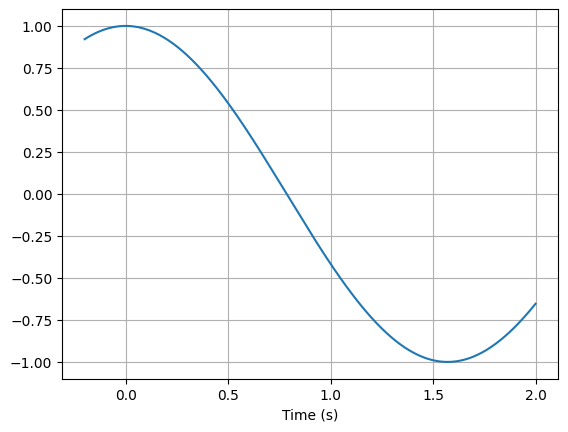

In [1]:
from lcapy import *

cos(2*t).plot()

Plus d'information sur [la documentation](https://lcapy.readthedocs.io/en/latest/expressions.html#Plotting)

# les fonctions spéciales

Il existe aussi des [fonctions spéciales](https://lcapy.readthedocs.io/en/latest/expressions.html")